In [20]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.3/13.3 MB 8.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/13.3 MB 7.6 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/13.3 MB 7.7 MB/s eta 0:00:02
   ------------------ --------------------- 6.3/13.3 MB 7.9 MB/s eta 0:00:01
   ------------------------ --------------- 8.1/13.3 MB 8.1 MB/s eta 0:00:01
   ----------------------------- ---------- 10.0/13.3 MB 8.2 MB/s eta 0:00:01
   ----------------------------------- ---- 11.8/13.3 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/820.7 kB ? eta -:--:--
   ---------------------------------------- 820.7/820.7 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [2]:
# Load dataset
df = pd.read_csv("CrimesOnWomenData.csv")


In [3]:
# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)


In [4]:
# Standardize column names
df.columns = df.columns.str.strip()


In [5]:
# Convert 'Year' to integer if needed
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [6]:
# Display basic info
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   736 non-null    object
 1   Year    736 non-null    int64 
 2   Rape    736 non-null    int64 
 3   K&A     736 non-null    int64 
 4   DD      736 non-null    int64 
 5   AoW     736 non-null    int64 
 6   AoM     736 non-null    int64 
 7   DV      736 non-null    int64 
 8   WT      736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB


In [7]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Year         Rape           K&A           DD           AoW  \
count   736.000000   736.000000    736.000000   736.000000    736.000000   
mean   2011.149457   727.855978   1134.542120   215.692935   1579.115489   
std       6.053453   977.024945   1993.536828   424.927334   2463.962518   
min    2001.000000     0.000000      0.000000     0.000000      0.000000   
25%    2006.000000    35.000000     24.750000     1.000000     34.000000   
50%    2011.000000   348.500000    290.000000    29.000000    387.500000   
75%    2016.000000  1069.000000   1216.000000   259.000000   2122.250000   
max    2021.000000  6337.000000  15381.000000  2524.000000  14853.000000   

               AoM            DV          WT  
count   736.000000    736.000000  736.000000  
mean    332.722826   2595.078804   28.744565  
std     806.024551   4042.004953   79.999660  
min       0.000000      0.000000    0.000000  
25%       3.000000     13.000000    0.000000  
50%      31.

In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64


In [9]:

# Check if 'Year' column exists
print(df.columns)

Index(['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'], dtype='object')


<Figure size 1200x600 with 0 Axes>

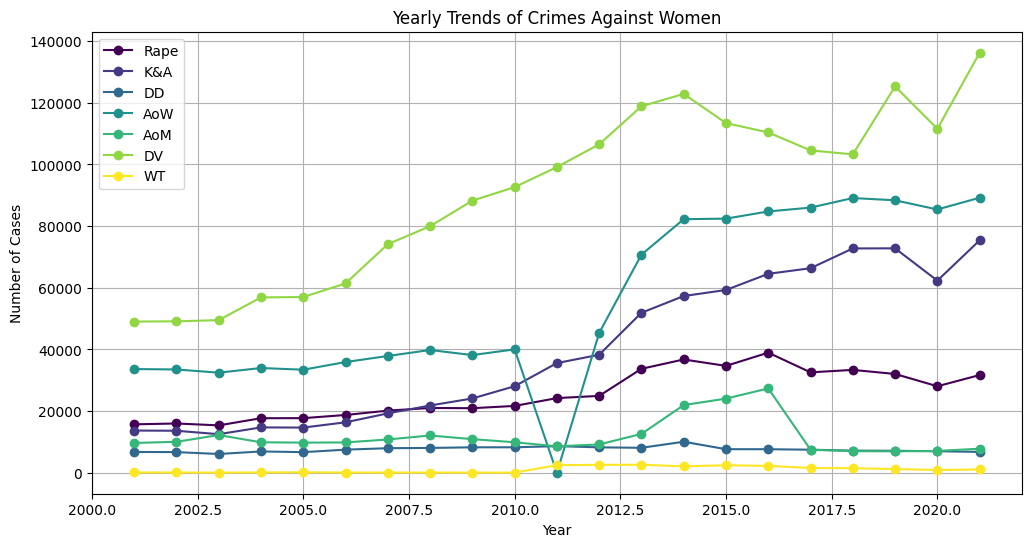

In [10]:
# Yearly Trend Analysis
plt.figure(figsize=(12,6))
df.groupby('Year').sum().plot(kind='line', marker='o', colormap='viridis', figsize=(12,6))
plt.title("Yearly Trends of Crimes Against Women")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid()
plt.show()

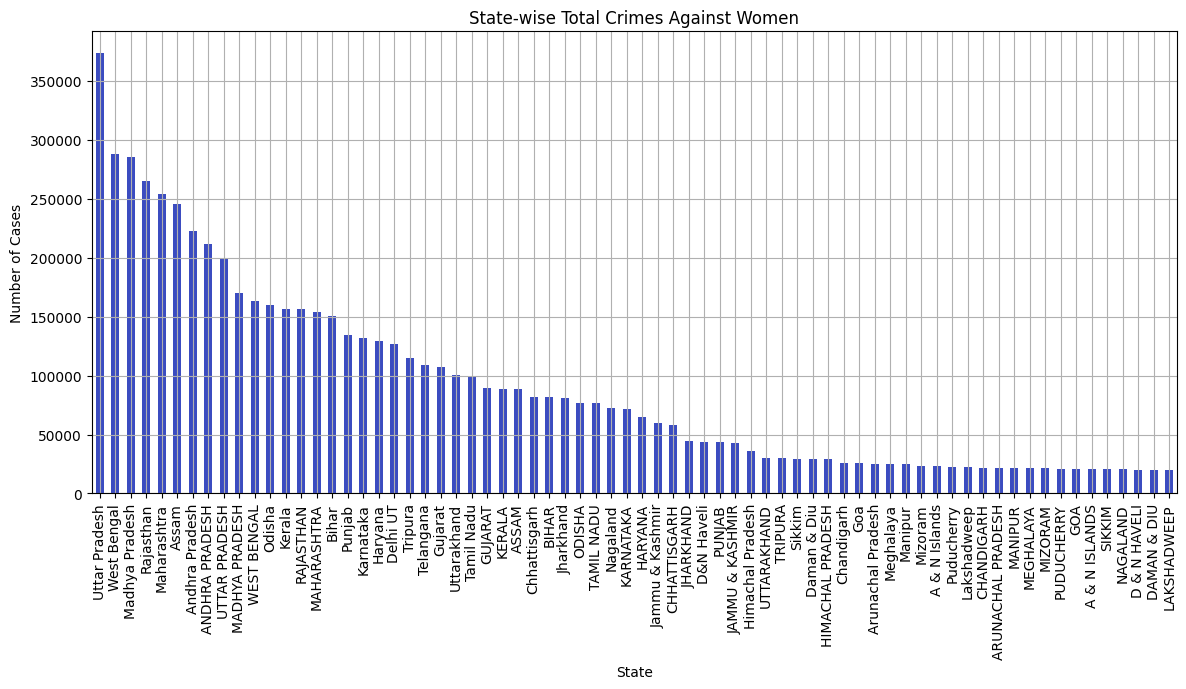

In [11]:
# State-wise Crime Distribution
plt.figure(figsize=(14,6))
df.groupby('State').sum().sum(axis=1).sort_values(ascending=False).plot(kind='bar', colormap='coolwarm')
plt.title("State-wise Total Crimes Against Women")
plt.xlabel("State")
plt.ylabel("Number of Cases")
plt.xticks(rotation=90)
plt.grid()
plt.show()

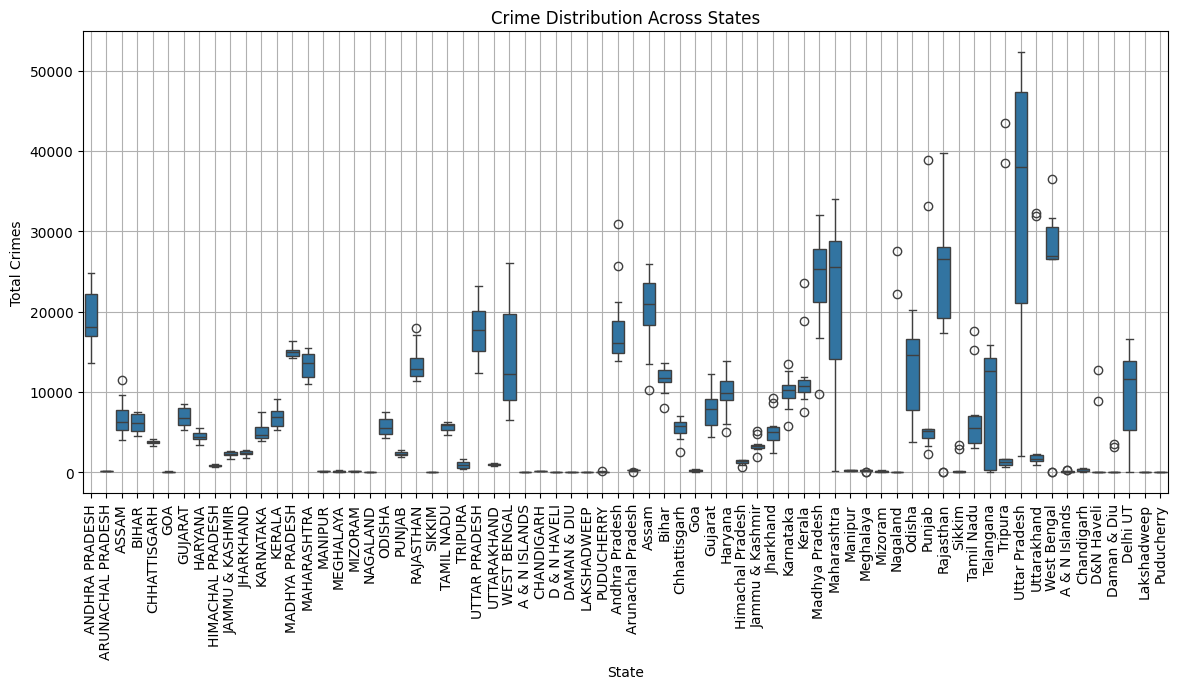

In [21]:
# State Comparison with Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(data=df.drop(columns=['Year']), x='State', y=df.drop(columns=['Year', 'State']).sum(axis=1))
plt.xticks(rotation=90)
plt.title("Crime Distribution Across States")
plt.xlabel("State")
plt.ylabel("Total Crimes")
plt.grid()
plt.show()

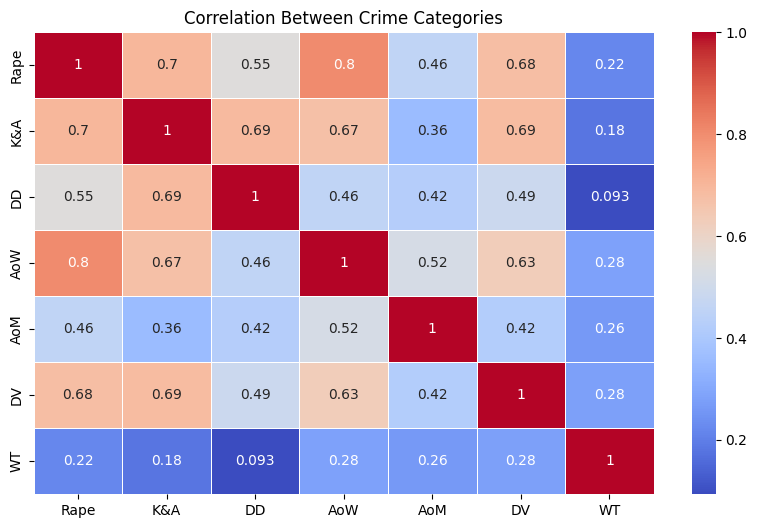

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Year', 'State']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Crime Categories")
plt.show()

In [13]:
# Top 5 States with Highest Crime
top_states = df.groupby('State').sum(numeric_only=True).sum(axis=1).sort_values(ascending=False).head(5)
print("\nTop 5 States with Highest Crimes Against Women:")
print(top_states)


Top 5 States with Highest Crimes Against Women:
State
Uttar Pradesh     373110
West Bengal       287983
Madhya Pradesh    284970
Rajasthan         265198
Maharashtra       254271
dtype: int64


In [14]:
# Time Series Forecasting with ARIMA
crime_trend = df.groupby('Year').sum(numeric_only=True).sum(axis=1)
model = ARIMA(crime_trend, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)
print("\nARIMA Forecast for Next 5 Years:")
print(forecast)

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib


ARIMA Forecast for Next 5 Years:
21    360037.652868
22    365637.501451
23    376467.409314
24    382718.366357
25    392704.766577
Name: predicted_mean, dtype: float64


C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
# Time Series Forecasting with Prophet
df_prophet = crime_trend.reset_index()
df_prophet.columns = ['ds', 'y']
prophet_model = Prophet()
prophet_model.fit(df_prophet)
future = prophet_model.make_future_dataframe(periods=5, freq='YE')
forecast_prophet = prophet_model.predict(future)


14:52:26 - cmdstanpy - INFO - Chain [1] start processing
14:52:26 - cmdstanpy - INFO - Chain [1] done processing


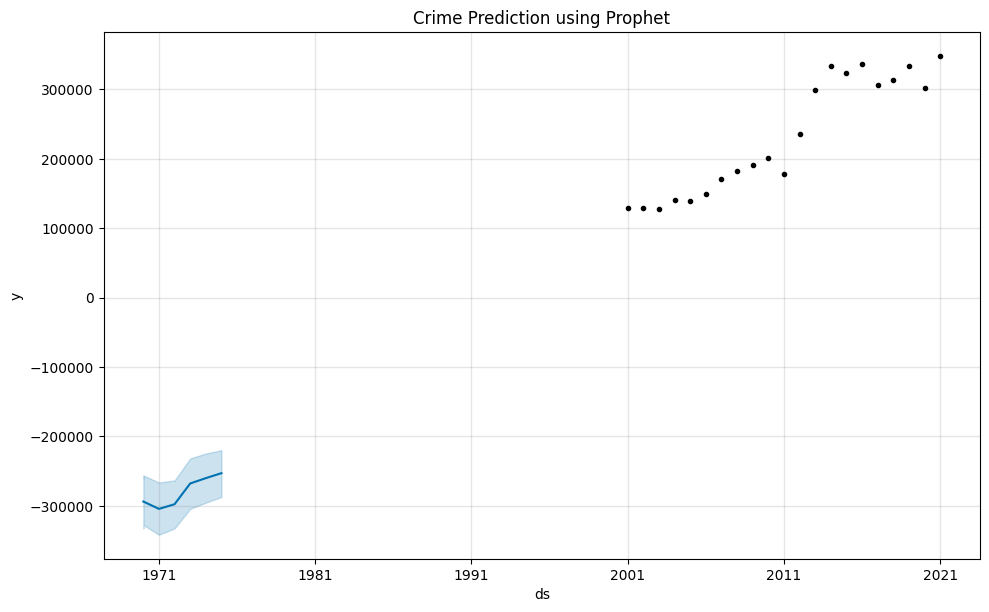

In [18]:
# Plot Prophet Forecast
fig = prophet_model.plot(forecast_prophet)
plt.title("Crime Prediction using Prophet")
plt.show()